**Постановка задачи**: компания хочет узнать по каким причинам сотрудники могут уйти.

**Цель**: Понять, какие факторы в наибольшей степени способствуют текучести кадров, и создать модель, которая может предсказать, уйдет ли определенный сотрудник из компании или нет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("HR.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.shape

(14999, 10)

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include = [object])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [9]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
data1 = data.rename(columns = {"satisfaction_level" : "satisfaction", 
                               "last_evaluation" : "evaluation", 
                               "number_project" : "projects", 
                               "average_montly_hours" : "hours",
                               "time_spend_company" : "time_spend", 
                               "Work_accident" : "accident", 
                               "promotion_last_5years" : "promotion",
                               "sales" : "department"})

In [12]:
data1.head()

,satisfaction,evaluation,projects,hours,time_spend,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
data1.isnull().any()

satisfaction    False
evaluation      False
projects        False
hours           False
time_spend      False
accident        False
left            False
promotion       False
department      False
salary          False
dtype: bool

In [87]:
left_rate = data1.left.value_counts() #/ data1.shape[0]
left_rate

0    11428
1     3571
Name: left, dtype: int64

In [15]:
left_summary = data1.groupby('left')
left_summary.mean()

,satisfaction,evaluation,projects,hours,time_spend,accident,promotion
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [16]:
data1.groupby(['department','salary','left']).size()

department   salary  left
IT           high    0         79
                     1          4
             low     0        437
                     1        172
             medium  0        438
                     1         97
RandD        high    0         47
                     1          4
             low     0        309
                     1         55
             medium  0        310
                     1         62
accounting   high    0         69
                     1          5
             low     0        259
                     1         99
             medium  0        235
                     1        100
hr           high    0         39
                     1          6
             low     0        243
                     1         92
             medium  0        242
                     1        117
management   high    0        224
                     1          1
             low     0        121
                     1         59
             medium  0

In [17]:
correlation = data1.corr()
correlation

,satisfaction,evaluation,projects,hours,time_spend,accident,left,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


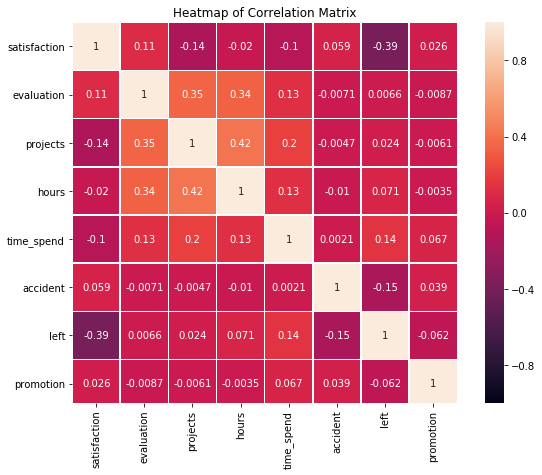

In [18]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True, linewidths = .5, square = True)
ax.set_ylim(len(correlation) - 0.1, 0)
plt.title("Heatmap of Correlation Matrix")
plt.show()

На теплокарте видно положительную корреляцию между количеством проектов, среднемесячными часами и оценкой работнику. Это может означать, что сотрудники, потратившие больше часов и выполнившие больше проектов, получили высокую оценку.

Между текучестью кадров и удовлетворенностью наблюдается отрицательная корреляция. Можно предположить, что люди склонны покидать компанию больше, когда они менее удовлетворены.

In [19]:
salary_map = {"low": 0, "medium": 1, "high": 2}
data1["salary"] = data1["salary"].map(salary_map)

In [20]:
one_hot_dep = pd.get_dummies(data1["department"])
data1 = data1.join(one_hot_dep)

In [21]:
data1 = data1.drop("department", axis = 1)

In [22]:
data1.head()

,satisfaction,evaluation,projects,hours,time_spend,accident,left,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
data1.shape

(14999, 19)

In [24]:
X = data1.drop("left", axis = 1)
y = data1.left

#### Стандартизация

In [25]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

#### Метод главных компонент

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components = 0.95)
X = pca.fit_transform(X)

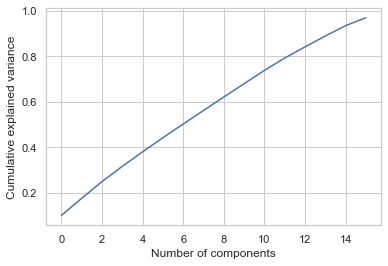

In [29]:
sns.set(style = "whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [30]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.1020214  0.17721485 0.2505578  0.3173174  0.3809778  0.44309102
 0.50307459 0.56251367 0.6214615  0.68008161 0.73816847 0.7924912
 0.84150281 0.88922428 0.93462041 0.96966103]


#### Деление на тренировочную и тестовую выборки

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    shuffle = True, random_state = 5, stratify = y)

In [33]:
print("Train: ", X_train.shape, y_train.shape, "\nTest: ", X_test.shape, y_test.shape)

Train:  (11999, 16) (11999,) 
Test:  (3000, 16) (3000,)


#### Resample

In [34]:
from sklearn.utils import resample

In [35]:
X_train_u, y_train_u = resample(X_train[y_train == 1],
                               y_train[y_train == 1],
                               replace = True,
                               n_samples = X_train[y_train == 0].shape[0],
                               random_state = 1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

In [36]:
print(X_train_u.shape)
print(y_train_u.shape)

(18284, 16)
(18284,)


#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [38]:
def param_selection(model, X, y, nfolds, params):
    grid_search = GridSearchCV(model, params, scoring = 'f1', n_jobs = -1, cv = nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [39]:
tuned_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

param_selection(LogisticRegression(), X_train_u, y_train_u, 5, tuned_params)

{'C': 1, 'penalty': 'l2'}

In [40]:
model_LR1 = LogisticRegression(C = 1, penalty = 'l2')
model_LR1.fit(X_train_u, y_train_u)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
def roc_curve_plot(model, X, y):
    probs = model.predict_proba(X)[:,1]
    auc = roc_auc_score(y, probs)
    fpr, tpr, thresholds = roc_curve(y, probs)
    
    plt.plot(fpr, tpr, 'b')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve, AUC = %0.4f' % auc)
    plt.show()

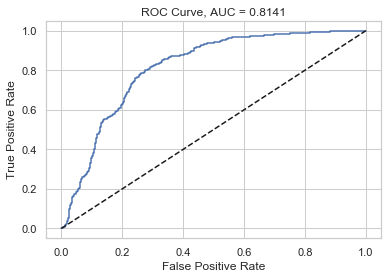

In [42]:
roc_curve_plot(model_LR1, X_test, y_test)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
y_pred = model_LR1.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[1678,  608],
       [ 151,  563]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2286
           1       0.48      0.79      0.60       714

   micro avg       0.75      0.75      0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.76      3000



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [49]:
def param_selection_random(model, X, y, nfolds, params, n_iter):
    grid_search = RandomizedSearchCV(model, params, n_iter, scoring = 'accuracy', n_jobs = -1, cv = nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

#### Random Forest

In [50]:
tuned_params = {'n_estimators': [100, 200, 300], 'min_samples_split': [2, 5, 10], 
                'min_samples_leaf': [1, 2, 4]}

param_selection_random(RandomForestClassifier(), X_train_u, y_train_u, 5, tuned_params, 15)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1}

In [51]:
model_RF1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 5)
model_RF1.fit(X_train_u, y_train_u)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

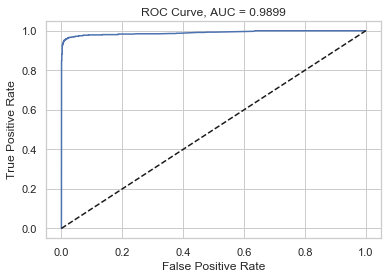

In [52]:
roc_curve_plot(model_RF1, X_test, y_test)

In [53]:
y_pred = model_RF1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2262,   24],
       [  34,  680]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.95      0.96       714

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



#### Decision Tree

In [55]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [2, 3, 4, 5, 6, 7]}

param_selection_random(DecisionTreeClassifier(), X_train_u, y_train_u, 5, tuned_params, 15)

{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 7}

In [56]:
model_DT1 = DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 2, max_depth = 7)
model_DT1.fit(X_train_u, y_train_u)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

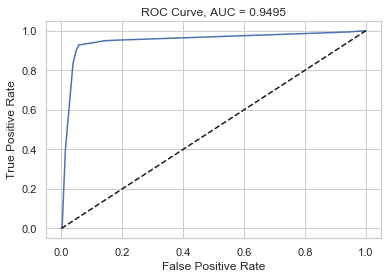

In [57]:
roc_curve_plot(model_DT1, X_test, y_test)

In [58]:
y_pred = model_DT1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2157,  129],
       [  51,  663]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.84      0.93      0.88       714

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [60]:
from sklearn import tree
import graphviz 
from graphviz import Source

In [61]:
importances = model_DT1.feature_importances_
feat_names = data1.drop(['left', 'support', 'technical'], axis = 1).columns

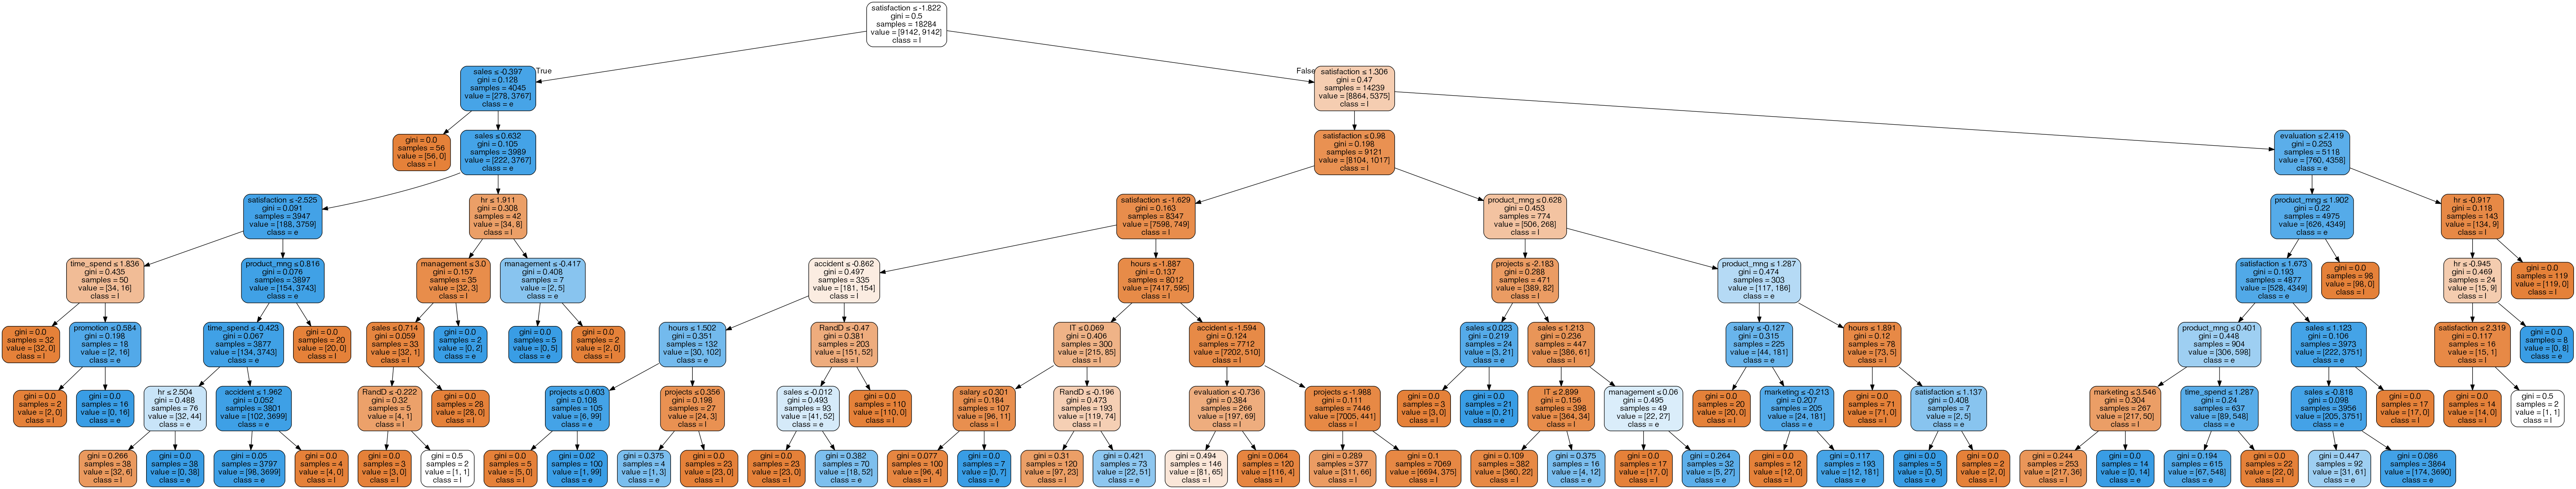

In [62]:
graph = Source(tree.export_graphviz(model_DT1, out_file = None, feature_names = feat_names, class_names = 'left',
                                   filled = True, rounded = True, special_characters = True))
png_bytes = graph.pipe(format = 'png')
with open('dtree.png', 'wb') as f:
    f.write(png_bytes)
    
from IPython.display import Image
Image(png_bytes)

#### KNN

In [63]:
k = list(range(1, 31))
tuned_params = {'n_neighbors': k}

param_selection(KNeighborsClassifier(), X_train_u, y_train_u, 5, tuned_params)

{'n_neighbors': 1}

In [64]:
model_KNN1 = KNeighborsClassifier(n_neighbors = 1)
model_KNN1.fit(X_train_u, y_train_u)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

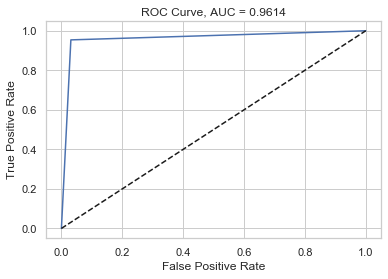

In [65]:
roc_curve_plot(model_KNN1, X_test, y_test)

In [66]:
y_pred = model_KNN1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2215,   71],
       [  33,  681]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.91      0.95      0.93       714

   micro avg       0.97      0.97      0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



#### SVM

In [68]:
Cs = [0.6, 0.9, 1, 2, 5, 10]
kernels = ['linear', 'rbf']

tuned_params = {'C': Cs, 'kernel' : kernels}

param_selection(SVC(), X_train_u, y_train_u, 5, tuned_params)

{'C': 10, 'kernel': 'rbf'}

In [69]:
model_SVC1 = SVC(C = 10, kernel = 'rbf', probability = True)
model_SVC1.fit(X_train_u, y_train_u)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

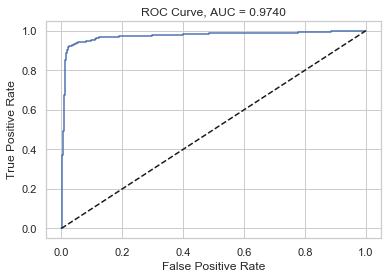

In [70]:
roc_curve_plot(model_SVC1, X_test, y_test)

In [71]:
y_pred = model_SVC1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2172,  114],
       [  45,  669]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.94      0.89       714

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



Сравнение

In [73]:
models = [model_LR1, model_RF1, model_DT1, model_KNN1, model_SVC1]

In [74]:
probs = []
for i in models:
    probs.append(i.predict_proba(X_test)[:,1])

In [75]:
aucs = []
for i in probs:
    aucs.append(roc_auc_score(y_test, i))

In [76]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, probs[0])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs[1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, probs[2])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, probs[3])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, probs[4])

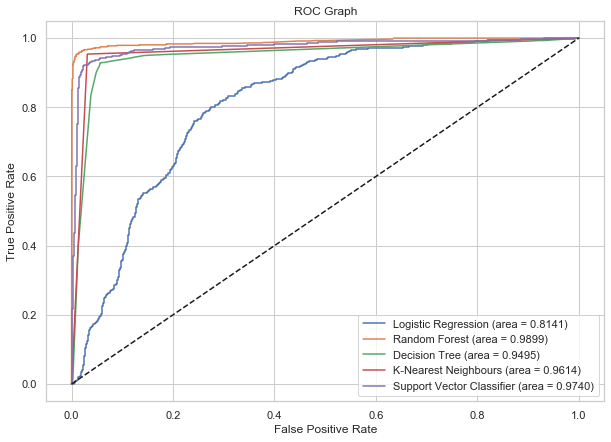

In [77]:
plt.figure(figsize = (10, 7))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression (area = %0.4f)' % aucs[0])
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.4f)' % aucs[1])
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree (area = %0.4f)' % aucs[2])
plt.plot(knn_fpr, knn_tpr, label = 'K-Nearest Neighbours (area = %0.4f)' % aucs[3])
plt.plot(svc_fpr, svc_tpr, label = 'Support Vector Classifier (area = %0.4f)' % aucs[4])

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc = "lower right")
plt.show()

#### Значимость признаков RF-model

Согласно нашей модели Random Forest по возрастанию представлены те признаки, которые влияют на уход сотрудников из компании

In [78]:
feature_labels = np.array(['satisfaction', 'evaluation', 'hours', 'projects', 'time_spend', 'accident', 'promotion', 'salary', 
                           'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales']) 
importance = model_RF1.feature_importances_ 
feature_by_importance = importance.argsort() 

for index in feature_by_importance: 
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] * 100))) 

promotion - 1.99%
management - 2.07%
salary - 2.19%
marketing - 2.68%
hours - 2.93%
RandD - 3.11%
evaluation - 3.30%
hr - 3.64%
IT - 3.70%
projects - 4.37%
accident - 4.43%
accounting - 5.88%
sales - 6.42%
time_spend - 7.51%
product_mng - 9.78%
satisfaction - 36.01%


In [79]:
predictions = []
for i in models:
    predictions.append(i.predict(X_test))

In [80]:
recall = []
precision = []
accuracy = []
F1_score = []
for i in predictions:
    recall.append(recall_score(y_test, i))
    precision.append(precision_score(y_test, i))
    accuracy.append(accuracy_score(y_test, i))
    F1_score.append(f1_score(y_test, i))

In [81]:
models_compare = pd.DataFrame({
    'Model': ['Logistic regression', 'Random forest', 'Decision Tree', 'K-Nearest Neighbours', 'Support Vector Classifier'],
    'Recall' : recall,
    'Precision' : precision,
    'Accuracy': accuracy,
    'F1_score' : F1_score,
    'AUC' : aucs
})

In [85]:
models_compare.sort_values(by = 'Accuracy', ascending = False).style.hide_index()

Model,Recall,Precision,Accuracy,F1_score,AUC
Random forest,0.952381,0.965909,0.980667,0.959097,0.989855
K-Nearest Neighbours,0.953782,0.905585,0.965333,0.929059,0.961361
Support Vector Classifier,0.936975,0.854406,0.947,0.893788,0.973985
Decision Tree,0.928571,0.837121,0.94,0.880478,0.949483
Logistic regression,0.788515,0.480786,0.747,0.597347,0.814062
